# Lab 3: Numerical Integration - Advanced
## 1. 
### 1.1.

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import scipy as scp
import scipy.interpolate as sc

In [8]:
# create font
font = {'family':'monospace', 'color':'black', 'size':13} # set font dictionary

# create graph format
plt.rcParams.update({
                    "legend.facecolor" : 'white',
                    "font.family" : "DejaVu Sans",
                    "xtick.bottom" : True,
                    "ytick.left" : True,
                    "legend.edgecolor" : 'black',
                    "legend.fancybox" : False,
                    'axes.facecolor' : 'white',
                    'legend.edgecolor' : 'black',
                    'xtick.labelsize' : 11,
                    'ytick.labelsize' : 11,
                    'axes.labelsize' : 13,
                    'axes.grid' : False,
                    'axes.edgecolor' : 'black',
                    'axes.linewidth': 1
                     })

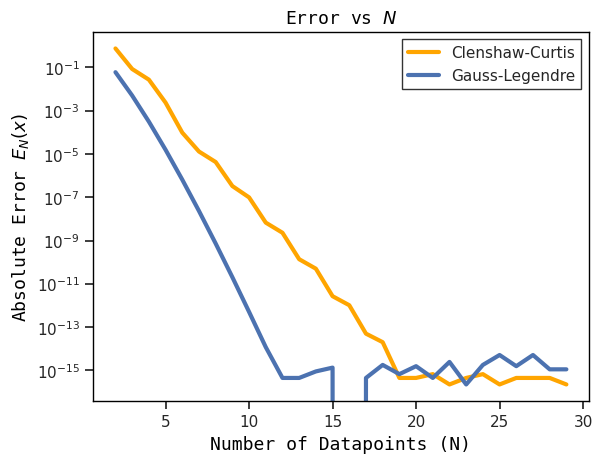

In [20]:
# create function(s) f(x)
def f1(x):
    return np.exp(-x**2)

def f2(x):
    return np.exp(-1/x**2)

# find analytical solution(s)
sol_an1 = scp.special.erf(1) * np.sqrt(np.pi)
sol_an2 = 2 * (np.sqrt(np.pi) * (scp.special.erf(1)-1) + np.exp(-1))

# create function for each integration method
def clenshaw_curtis(f, n):
    '''
        f: separate function of x
        n: degree of interpolation polynomial
        I: integration approximation of f(x)
        w: weight
        x: legendre nodes
    '''

    n = float(n)
    na = np.arange(0, n+1, 1) 
    x = np.cos(np.pi * na/n) # select chebyshev nodes (x)
    fx = f(x) / (2*n) # create chebyshev polynomial f(x) using nodes (x)
    ind_1 = np.arange(0, n+1, 1, dtype=int)
    ind_2 = np.arange(n-1, 0, -1, dtype=int)
    ind = np.concatenate((ind_1, ind_2))
    g = np.real(np.fft.fft(fx[ind]));
    a = g[1:int(n)] + g[2*int(n)-1:int(n):-1]
    a = np.insert(a, [0, len(a)], [g[0], g[int(n)]])
    w = np.zeros(len(a))
    ii = np.arange(0, n+1, 2)
    w[::2] = 2 / (1 - ii**2)
    I = np.dot(w,a) # integration of f(x)

    return I, w, x

def gauss_legendre(f, n):
    '''
        f: a function of x
        n: degree of interpolation polynomial
        I: integration approximation of f(x)
        w: weight
        x: clenshaw-curtis nodes
    '''

    n = float(n)
    na = np.arange(1, n+1, 1) 
    beta = 0.5 / np.sqrt(1 - ((2 * na)**(-2)))
    T = np.diag(beta, 1) + np.diag(beta, -1)
    [x, V] = npl.eig(T)
    i = np.argsort(x)
    x = np.sort(x) # create legendre nodes (x)
    w = 2 * V[0,i]**2
    I = np.dot(w, f(x)) # integration of f(x)

    return I, w, x

# set maximum polynomial order (N)
n = 30

# create empty arrays for the generated errors
err_cc_1=np.zeros(n); err_gl_1=np.zeros(n)
err_cc_2=np.zeros(n); err_gl_2=np.zeros(n)

# create loop to generate error for different number of nodes (N)
for k in range(2,n):
    err_cc_1[k] = abs(clenshaw_curtis(f1, k-1)[0] - sol_an1)
    err_gl_1[k] = abs(gauss_legendre(f1, k-1)[0] - sol_an1)

    err_cc_2[k]=abs(clenshaw_curtis(f2, k-1)[0] - sol_an2)
    err_gl_2[k]=abs(gauss_legendre(f2, k-1)[0] - sol_an2)

# plot data onto graph
plt.semilogy(range(2,n), err_cc_1[2::], 'orange', label='Clenshaw-Curtis', lw=3)
plt.semilogy(range(2,n), err_gl_1[2::], 'b', label='Gauss-Legendre', lw=3)

# format graph
plt.title('Error vs $N$', fontdict=font)
plt.xlabel('Number of Datapoints (N)', fontdict=font)
plt.ylabel('Absolute Error $E_N(x)$', fontdict=font)
plt.legend()

### 1.2

C:\Users\Tricia\AppData\Local\Temp\ipykernel_21268\4234589333.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-1/x**2)


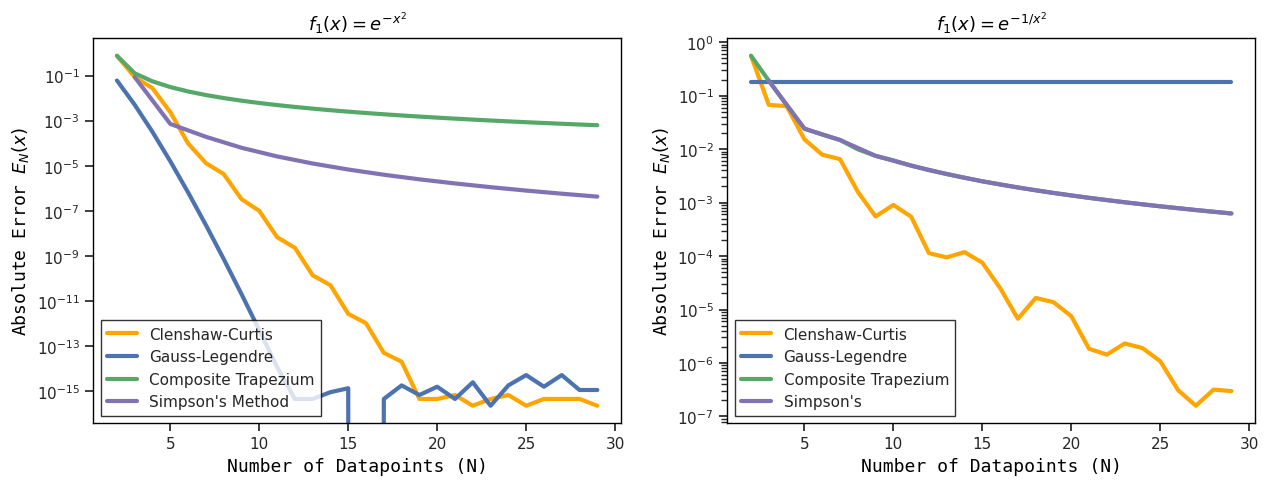

In [21]:
# create two different function(s) f(x)
def f1(x):
    return np.exp(-x**2)

def f2(x):
    return np.exp(-1/x**2)

# create function for trapezium method
def int_t(y,h):
    I_r = h*(np.sum(y)-y[-1])
    return I_r

# create function for simpson's method
def int_s(y,h):
    I_s = (y[0]+y[-1]+4*np.sum(y[1:-1:2])+2*np.sum(y[2:-1:2]))*h/3
    return I_s

# set maximum polynomial order (N)
N = 30

# create empty arrays for the generated errors of f1(x)
err_cc_f1 = np.zeros(N)
err_gl_f1 = np.zeros(N)
err_t_f1 = np.zeros(N)
err_s_f1 = np.zeros(N)

# create empty arrays for the generated errors of f2(x)
err_cc_f2 = np.zeros(N)
err_gl_f2 = np.zeros(N)
err_t_f2 = np.zeros(N)
err_s_f2 = np.zeros(N)

# create boundaries for simpson's and trapezium method
a,b = -1,1

# create loop to generate error for different number of nodes (N)
for k in range(2,N):
    # find error for integration approximations of 1st function f(x)
    err_cc_f1[k] = abs(clenshaw_curtis(f1,k-1)[0] - sol_an1) 
    err_gl_f1[k] = abs(gauss_legendre(f1,k-1)[0] - sol_an1)
    err_t_f1[k] = abs(int_t(f1(np.linspace(-1,1,k)), (b-a)/(k-1)) - sol_an1)
    err_s_f1[k] = abs(int_s(f1(np.linspace(-1,1,k)), (b-a)/(k-1)) - sol_an1)

    # find error for integration approximations of 2nd function f(x)
    err_cc_f2[k] = abs(clenshaw_curtis(f2, k-1)[0] - sol_an2)
    err_gl_f2[k] = abs(gauss_legendre(f2, -1)[0] - sol_an2)
    err_t_f2[k] = abs(int_t(f2(np.linspace(-1,1,k)), (b-a)/(k-1)) - sol_an2)
    err_s_f2[k] = abs(int_s(f2(np.linspace(-1,1,k)), (b-a)/(k-1)) - sol_an2)
    
plt.figure(figsize=(15, 5))

# plot data onto graph for 1st function f(x)
plt.subplot(1,2,1)
plt.semilogy(range(2,N), err_cc_f1[2::], 'orange', label='Clenshaw-Curtis', lw=3)
plt.semilogy(range(2,N), err_gl_f1[2::], 'b', label='Gauss-Legendre', lw=3)
plt.semilogy(range(2,N), err_t_f1[2::], 'g', label='Composite Trapezium', lw=3)
plt.semilogy(range(3,N,2), err_s_f1[3::2], 'm', label="Simpson's Method", lw=3)

plt.title('$f_1(x)=e^{-x^2}$', fontdict=font)
plt.xlabel('Number of Datapoints (N)', fontdict=font)
plt.ylabel('Absolute Error $E_N(x)$', fontdict=font)
plt.legend()

# plot data onto graph for 2nd function f(x)
plt.subplot(1,2,2)
plt.semilogy(range(2,N), err_cc_f2[2::], 'orange', label='Clenshaw-Curtis', lw=3)
plt.semilogy(range(2,N), err_gl_f2[2::], 'b', label='Gauss-Legendre', lw=3)
plt.semilogy(range(2,N), err_t_f2[2::], 'g', label="Composite Trapezium", lw=3)
plt.semilogy(range(3,N,2), err_t_f2[3::2], 'm', label="Simpson's", lw=3)

plt.title('$f_1(x)=e^{-1/x^2}$', fontdict=font)
plt.xlabel('Number of Datapoints (N)', fontdict=font)
plt.ylabel('Absolute Error $E_N(x)$', fontdict=font)
plt.legend()

### 1.3.

Text(0, 0.5, 'Absolute Error')

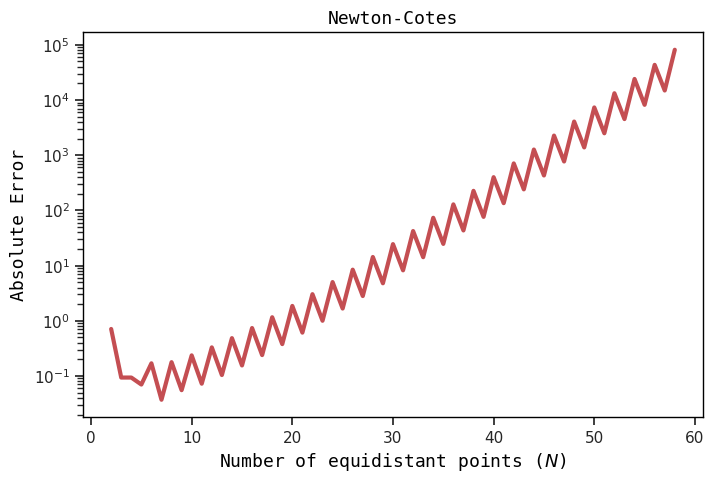

In [23]:
# create function f(x)
def func(x):
    return 1 / (1+16*x**2)

N = 60 # number of datapoints (N)
n = N-1 # number of intervals (n)

# find analytical solution to f(x)
sol_an = np.arctan(4) / 2

# create input for f(x)
x = np.linspace(-1, 1, n*1000)

err = np.zeros(n)

for k in range(2,n):
    x = np.linspace(-1, 1, k+1)
    # find polynomial B to interpolate
    B = sc.BarycentricInterpolator(x, func(x))
    # find current error for interpolation degree k
    err[k] = abs(gauss_legendre(B.__call__, 2*n)[0] - sol_an)

# plot graph
plt.figure(figsize=(8,5))
plt.semilogy(range(2,n), err[2::], 'r', lw=3)

# format graph
plt.title("Newton-Cotes", fontdict=font)
plt.xlabel('Number of equidistant points ($N$)', fontdict=font)
plt.ylabel('Absolute Error', fontdict=font)

Error increases with degree of polynomial.

### 1.4.

Newton-Cotes methods can be used when the function $f(x)$ is unknown.